#Import Libraries

In [1]:
import pandas as pd
import numpy as np

#Read the dataset

In [2]:
df = pd.read_csv("car data.csv")

In [4]:
df.sample(5)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
260,city,2016,9.15,13.60,29223,Petrol,Dealer,Manual,0
103,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0
116,Royal Enfield Classic 350,2013,1.10,1.47,33000,Petrol,Individual,Manual,0
167,TVS Apache RTR 160,2014,0.42,0.81,42000,Petrol,Individual,Manual,0
14,dzire,2009,2.25,7.21,77427,Petrol,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

# let's first check na value

In [6]:
df.isna().values.any()

False

In [7]:
print("Fuel Type: ", df.Fuel_Type.unique())
print("Seller Type: ", df.Seller_Type.unique())
print("Transmission: ", df.Transmission.unique())
print("Owner: ", df.Owner.unique())

Fuel Type:  ['Petrol' 'Diesel' 'CNG']
Seller Type:  ['Dealer' 'Individual']
Transmission:  ['Manual' 'Automatic']
Owner:  [0 1 3]


In [8]:
# year indicates a purchased year of car, it's basically use for calculating how many years old that car

# for that we need to subtract year from current year

from datetime import datetime

df["Current_year"] = datetime.now().year

# now let's subtract Year from Current Year
df["Year"] = df.Current_year - df.Year


In [9]:
# now let's drop current year we don't need it

df.drop(columns="Current_year", axis = 1, inplace = True)

In [10]:
# let's encode text or categorical data using one hot encoding
# let's create  dummy variables for Fuel_Type Seller_Type and Transmission

dummy = pd.get_dummies(df[["Fuel_Type", "Seller_Type", "Transmission"]], drop_first = True)
# drop first columns for preventing dummy variable trape
# for Fuel_Type CNG will be Removed, for Seller Type Dealer will be removed and fo Transmission Automatic remove
df = pd.concat( [df, dummy], axis = 1)
# now we don't need that original text data columns so let's drop it
df.drop(columns = ["Fuel_Type", "Seller_Type", "Transmission"], inplace = True)

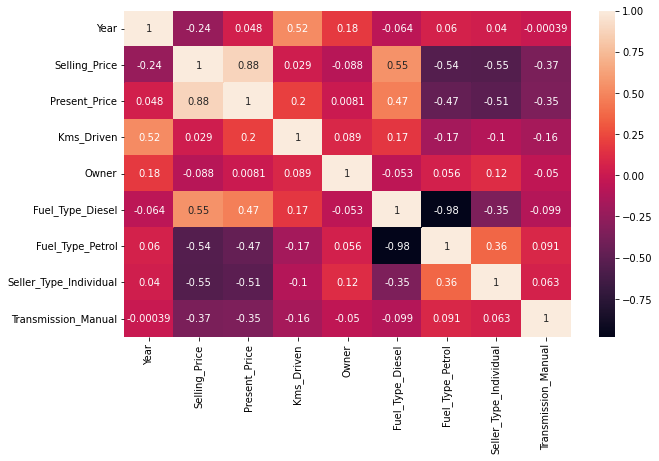

In [11]:
# let's get a corelation of our data

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [12]:
# let's encode Car_Name text data using one hot encoding

# for this let's convert first Car_Names data into lowercase

df.Car_Name = df.Car_Name.str.lower()

dummy = pd.get_dummies(df.Car_Name, drop_first = True)
# here we dropped first columns which is 800 for prevent dummy variable trap 

df = pd.concat([df, dummy], axis = 1)
# now we don't need Car_Name columns so let's drop it
df.drop("Car_Name", axis = 1, inplace = True)

In [13]:
# now let's create a feature matrix X and target vector y

X = df.drop(columns="Selling_Price")
y = df.Selling_Price

In [14]:
# let's find important feature using ExtraTreesRegressor model 

from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor()
etr.fit(X, y)
important_features = etr.feature_importances_

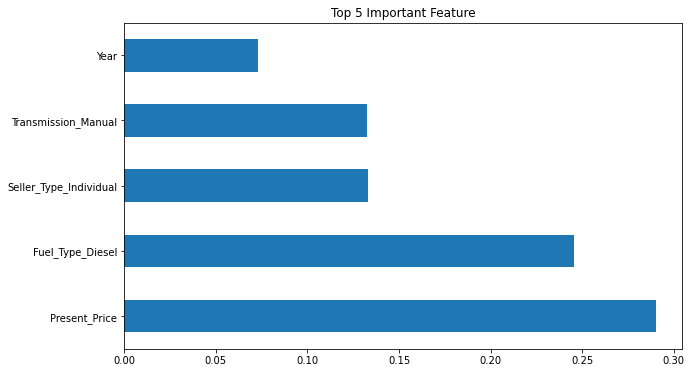

In [15]:
































p# let's get top important features

important_features = pd.Series(important_features, index = X.columns).sort_values(ascending = False)
# let's plot top 5 important feature

plt.figure(figsize = (10, 6))
important_features[:5].plot(kind = "barh")
plt.title("Top 5 Important Feature")

plt.show()

# Splitting dependent and independent columns

In [17]:
X = df.iloc[: , : -1]
y = df.iloc[ : , -1]

In [18]:
X.shape

(301, 105)

In [19]:
y.shape

(301,)

# Splitting the data into train and test

In [16]:
# let's divide our data into train and test part
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)